<a href="https://colab.research.google.com/github/iAmirHosein92/Class_Exercise_Solution/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

sns.set_theme(context='notebook', palette='pastel', style='whitegrid')

In [20]:
df = pd.read_csv('studentdata.csv')

In [21]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [23]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [24]:
sum(df.duplicated())

0

In [25]:
df.drop(['StudentID', 'GPA'], axis=1, inplace=True)

In [26]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]
categorical_columns = df.columns.difference(numerical_columns).difference(['GradeClass']).to_list()

In [27]:
numerical_columns

['StudyTimeWeekly', 'Absences']

In [28]:
categorical_columns

['Age',
 'Ethnicity',
 'Extracurricular',
 'Gender',
 'Music',
 'ParentalEducation',
 'ParentalSupport',
 'Sports',
 'Tutoring',
 'Volunteering']

In [29]:
custom_label = {
    'Age':[15, 16, 17 ,18],
    'Ethnicity' : ['Caucasian', 'African American','Asian', 'Other'],
    'ParentalEducation' : ['None','High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

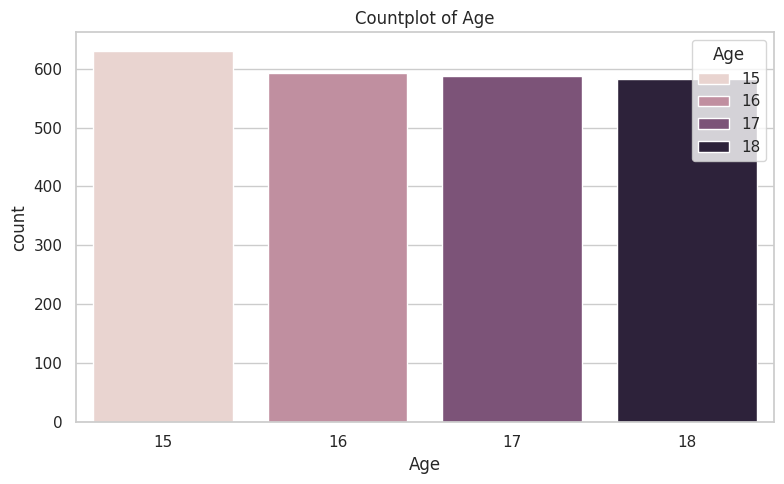

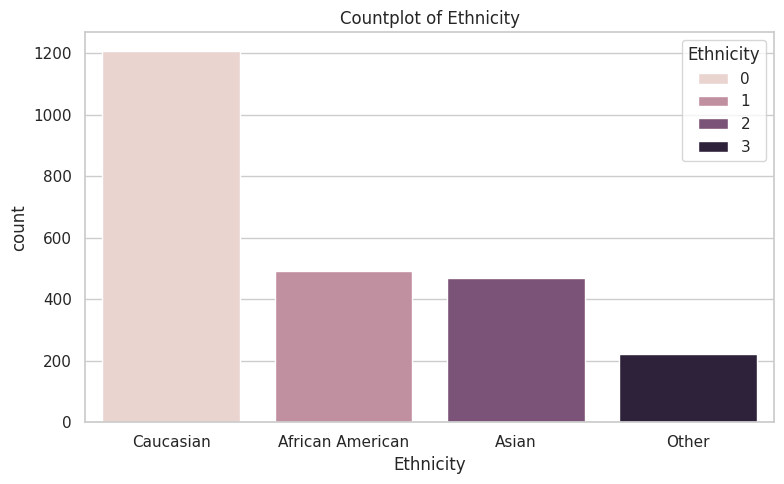

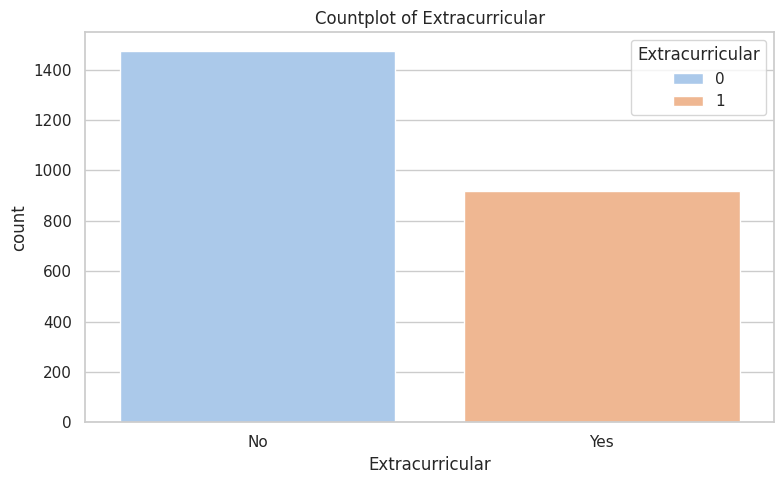

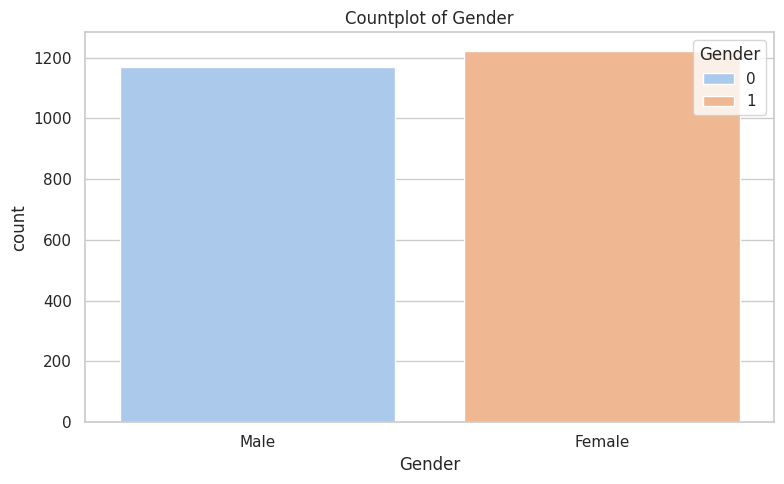

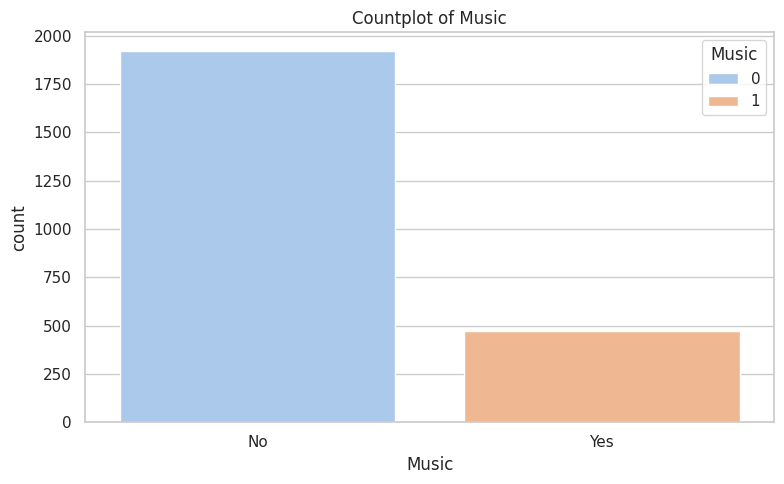

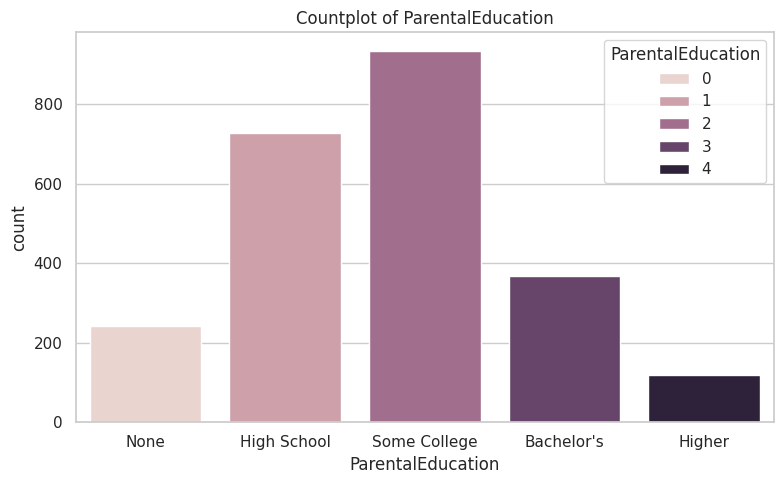

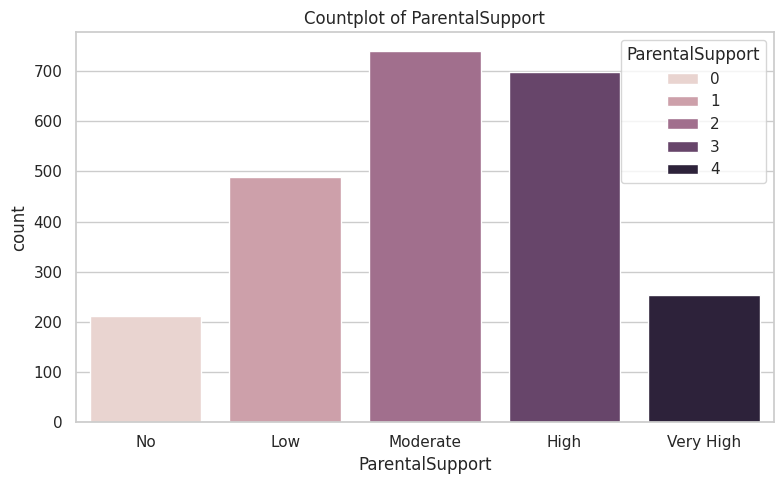

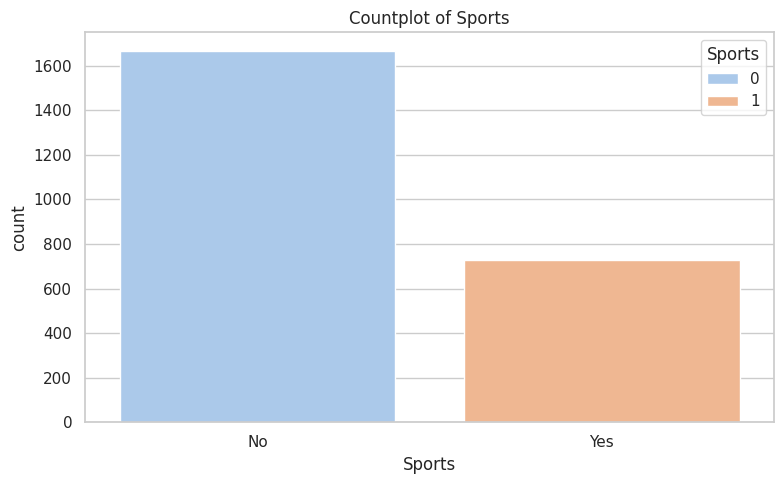

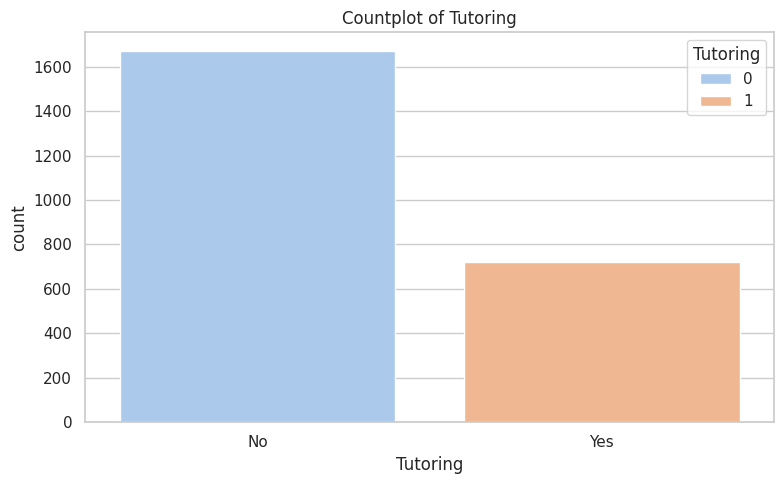

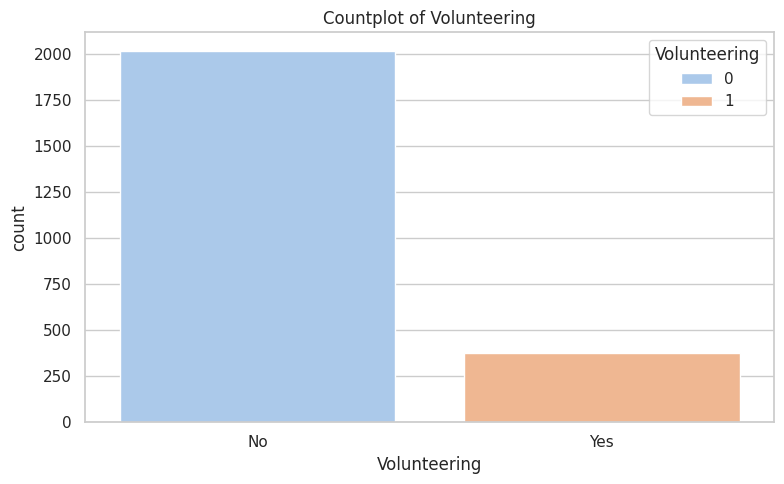

In [31]:
for column in categorical_columns:
  plt.figure(figsize=(8, 5))
  sns.countplot(data=df, x=column, hue=column)
  plt.title(f'Countplot of {column}')

  labels = custom_label[column]
  ticks = range(len(labels))
  plt.xticks(labels=labels, ticks=ticks)
  plt.tight_layout()

  plt.show()

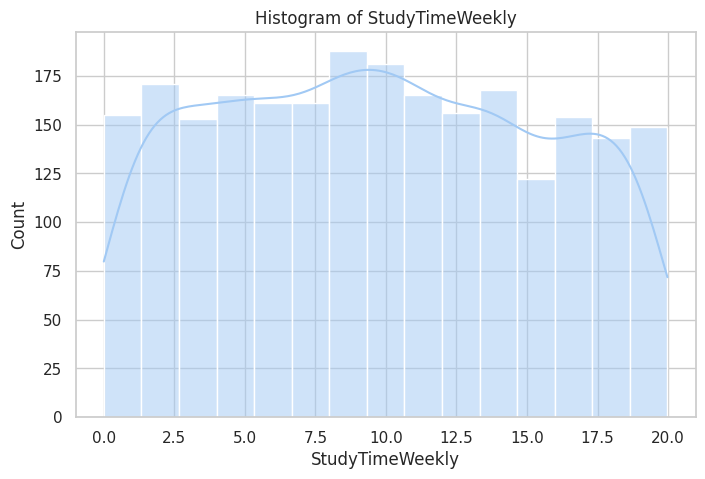

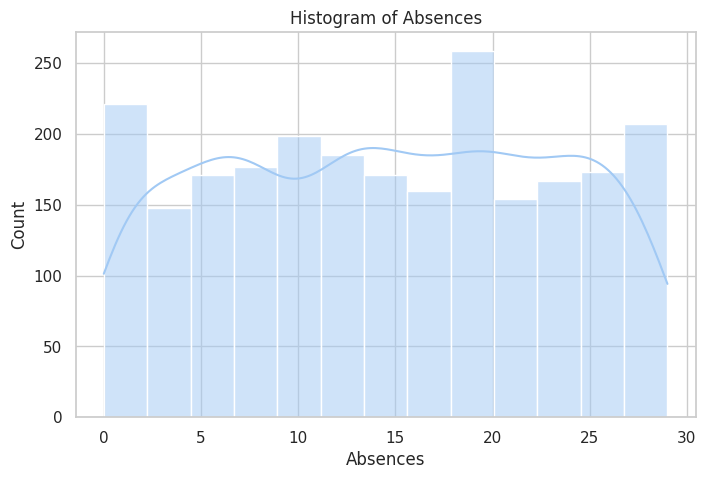

In [48]:
for column in numerical_columns:
  plt.figure(figsize=(8,5))
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Histogram of {column}')

  plt.show()

In [43]:
correlations = df.corr(numeric_only=True)['GradeClass'][:-1].sort_values()

In [45]:
correlations

,GradeClass
ParentalSupport,-0.136823
StudyTimeWeekly,-0.134131
Tutoring,-0.111695
Extracurricular,-0.069733
Music,-0.036065
Sports,-0.026654
Ethnicity,-0.023326
Age,-0.006250
Volunteering,0.013156
Gender,0.022998


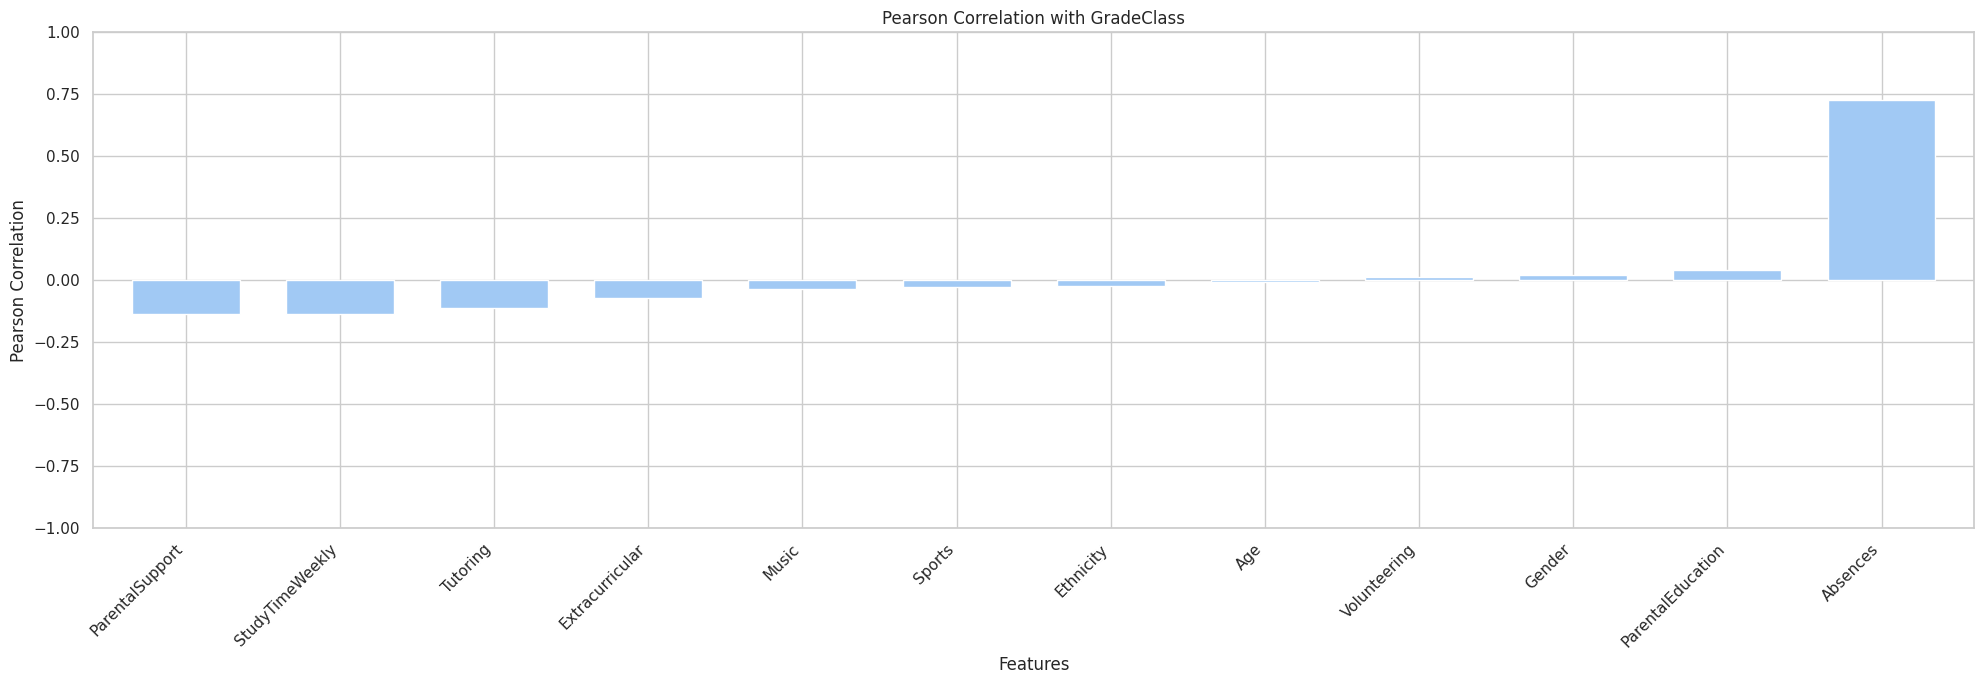

In [46]:
plt.figure(figsize=(20, 7))
ax = correlations.plot(kind='bar', width= 0.7)
ax.set(ylim=[-1,1], ylabel='Pearson Correlation', xlabel='Features', title='Pearson Correlation with GradeClass')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

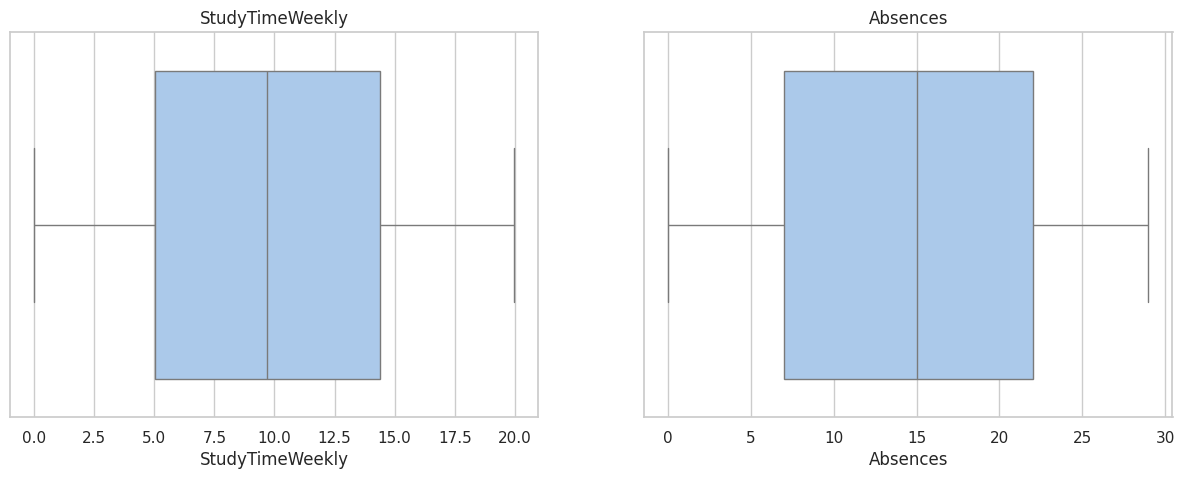

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

for i in  range(2):
  sns.boxplot(ax=ax[i], x=df[numerical_columns[i]])
  ax[i].set_title(numerical_columns[i])

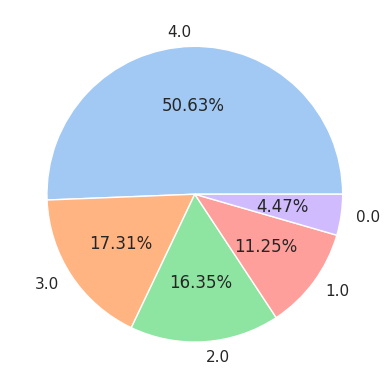

In [51]:
plt.pie(x=df['GradeClass'].value_counts(), labels=df['GradeClass'].value_counts().index, autopct='%.2f%%')
plt.show()

In [54]:
features = df.drop(['GradeClass'], axis=1)
features

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,1,2,0,0,1,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0


In [55]:
target = df['GradeClass']
target

,GradeClass
0,2.0
1,1.0
2,4.0
3,3.0
4,4.0
...,...
2387,0.0
2388,4.0
2389,2.0
2390,1.0


In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42, stratify=target)

In [58]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier()
}


In [61]:
model_names = []
accuracies = []
param_grids = {
    'LogisticRegression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    },
    'SGDClassifier': {
        'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9, 11],
    },
    'SVC': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'DecisionTreeClassifier': {
        'max_depth': [3, 5, 7, 9, 11],
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [3, 5, 7, 9, 11],
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
    }
}

for name, clf in models.items():
    grid_search = GridSearchCV(clf, param_grids[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(accuracy)
    print(f'{name} Accuracy: {accuracy}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')




LogisticRegression Accuracy: 0.7423398328690808
Best Parameters: {'C': 10}
Confusion Matrix:
[[  8   9   5   4   6]
 [  7  38  28   2   6]
 [  0  19  76  17   5]
 [  0   1  33  66  24]
 [  0   3   2  14 345]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.25      0.34        32
         1.0       0.54      0.47      0.50        81
         2.0       0.53      0.65      0.58       117
         3.0       0.64      0.53      0.58       124
         4.0       0.89      0.95      0.92       364

    accuracy                           0.74       718
   macro avg       0.63      0.57      0.59       718
weighted avg       0.73      0.74      0.73       718

SGDClassifier Accuracy: 0.5974930362116991
Best Parameters: {'loss': 'hinge'}
Confusion Matrix:
[[  6   6   7   4   9]
 [ 14  18  28  13   8]
 [ 14  12  30  29  32]
 [  3   5  10  19  87]
 [  1   2   3   2 356]]
Classification Report:
              precision    recall  f1-score 